In [1]:
l1 = ['']
l2 = ['']
l3 = ['']
l4 = ['']

In [2]:
import quandl,math
import matplotlib.pyplot as plt

quandl.ApiConfig.api_key = 'ewxKJJzQ3f8Lxz-xHeoK'

def isNaN(num):
    return num != num

## Moving Averages Indicator

2007-01-31 00:00:00
2007-02-28 00:00:00
2007-03-30 00:00:00
2007-04-30 00:00:00
2007-05-31 00:00:00
2007-06-29 00:00:00
2007-07-31 00:00:00
2007-08-31 00:00:00
2007-09-28 00:00:00
2007-10-31 00:00:00
2007-11-30 00:00:00
2007-12-31 00:00:00
2008-01-31 00:00:00
2008-02-29 00:00:00
2008-03-31 00:00:00
2008-04-30 00:00:00
2008-05-30 00:00:00
2008-06-30 00:00:00
2008-07-31 00:00:00
2008-08-29 00:00:00
2008-09-30 00:00:00
2008-10-31 00:00:00
2008-11-28 00:00:00
2008-12-31 00:00:00
2009-01-30 00:00:00
2009-02-27 00:00:00
2009-03-31 00:00:00
2009-04-30 00:00:00
2009-05-29 00:00:00
2009-06-30 00:00:00
2009-07-31 00:00:00
2009-08-31 00:00:00
2009-09-30 00:00:00
2009-10-30 00:00:00
2009-11-30 00:00:00
       adj_close       date ticker        MA50       MA200
None                                                      
935   204.039851 2006-04-17  GOOGL         NaN         NaN
934   202.745857 2006-04-18  GOOGL         NaN         NaN
933   205.885549 2006-04-19  GOOGL         NaN         NaN
932  

C:\Users\Yasha Ballal\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


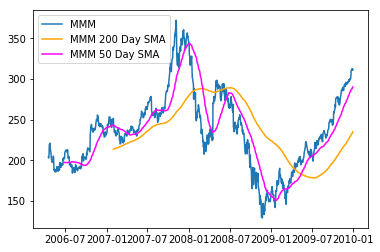

In [3]:
data = quandl.get_table('WIKI/PRICES', ticker = ['GOOGL'], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': '2006-04-14', 'lte': '2009-12-31' }, 
                        paginate=True)

data = data.sort_index(axis=1 ,ascending=True)
data = data.iloc[::-1]

data['MA50'] = data.adj_close.rolling(window=50).mean()
data['MA200'] = data.adj_close.rolling(window=200).mean()

for i in range (len(data['ticker'])-1,0,-1):
    if not isNaN(data['MA200'][i]):
        #print(data['date'][i])
        if i!=0:
            if str(data['date'][i]).split('-')[1] != str(data['date'][i-1]).split('-')[1]:
                print(data['date'][i])
                if data['adj_close'][i-1]>data['MA50'][i-1] and data['MA50'][i-1]>data['MA200'][i-1]:
                    l1.append('buy')
                else:
                    l1.append('sell')                    
print(data)
plt.plot(data['date'], data['adj_close'], label='MMM')
plt.plot(data['date'], data['MA200'], label='MMM 200 Day SMA', color='orange')
plt.plot(data['date'], data['MA50'], label='MMM 50 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()
plt.show()

In [4]:
# codify the MA indicators of WOO 

# Using pfpy package to deploy the Points and Figures method
# Pfpy Issues:
# 1. It does not use pandas dataframe, instead it uses OrderedDict
# 2. It does not use conventional definition of boxes.
# 3. It does not give the support/resistance explicitly



from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
import pandas as pd



#ts = TimeSeries(key='ZSAE2CXUXOLE67NH', output_format= 'pandas')

assets = [#'MSFT', 
          'GOOGL',
          #'MMM'
          #'SPY',
          #'BA',
          # 
          ]
          
"""
          "MMM", "AXP", "AAPL", "BA", "CAT", "CVX", "CSCO","KO",
          "DIS","DD","XOM","GE","GS","HD","IBM","INTC","JPM","MCD",
          "MRK","MSFT","NKE","PFE","PG","TRV","UTX","UNH","VZ","V","WMT"
          """         


def get_combined_daily_ts(ts_list):
    """
    Get daily adjusted data and combine them into one dataframe
    """
    ts = TimeSeries(key='ZSAE2CXUXOLE67NH', output_format= 'pandas')
    #data_tmp = pd.DataFrame(0 ,  columns = assets)  
    d = []

    for s in ts_list:
        data, meta_data = ts.get_daily_adjusted(symbol=s, outputsize='full')
        #data.rename(columns = {"5. adjusted close": s}, inplace  = True)
        d.append(data)
    
    df = pd.concat(d, axis=1)
    return df


In [5]:
price = get_combined_daily_ts(assets)

price.to_csv('PF_data.csv') # Save the data in the current local folder
price.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,50.3228,44659000.0,0.0,1.0
2004-08-20,101.01,109.08,100.50,108.310,54.3227,22834300.0,0.0,1.0
2004-08-23,110.76,113.48,109.05,109.400,54.8694,18256100.0,0.0,1.0
2004-08-24,111.24,111.60,103.57,104.870,52.5974,15247300.0,0.0,1.0
2004-08-25,104.76,108.00,103.88,106.000,53.1641,9188600.0,0.0,1.0


In [6]:
# Install pypf package https://pypi.org/project/pypf/
# pip install pypf

from pypf.chart import PFChart
#from pypf.instrument import SavedSecurity
from pypf.instrument import Instrument

## Point and Figure Indicator

In [7]:
columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividend', 'Split']
df = pd.read_csv('PF_data.csv', parse_dates = [0], header = 0, names=columns) #,  index_col=[0])


#df.to_csv('PF_data_processed.csv')
entry = 0
exit = 0
#print(str(df['Date'][2]).split('-')[1])
#print(len(df))
#print(df['Date'][3])
count=0

for i in range(1,len(df)):
    #print(str(df['Date'][i]).split("-"))
    if str(df['Date'][i]).split("-")[0] in ['2007','2008','2009'] and (str(df['Date'][i]).split('-')[1] != str(df['Date'][i+1]).split('-')[1]):
        exit = i            
        print('Exit is: '+str(exit))
        df1 = df[columns][entry:exit+1]
        l3.append(df['Date'][exit])
        l4.append(df['Adj Close'][exit])
        df1.to_csv('PF_formated_data'+str(count)+'.csv')
        #df1.head()
        symbol, force_download, force_cache, interval, period, debug, data_directory, data_file = ('GOOGL', False, True, "1d", 10, False, "C:\\Users\\Yasha Ballal\\CSE510", 'PF_formated_data'+str(count)+'.csv')
        i1 = Instrument(symbol, force_download, force_cache, interval, period, debug, data_directory, data_file)
        #security = SavedSecurity('AAPL', "1d",  10, False, '.\PF_data.csv')
        security, box_size, duration, interval, method, reversal, style, trend_lines, debug = (i, .01, 1.0, 'd', 'hl', 3, False, False, False)
        security
        para = (i1, .01, 1.0, 'd', 'hl', 3, False, False, False)

        # duration=1.0,interval='d', method='hl', reversal=3, style=False,trend_lines=False, debug=False
        c = PFChart(i1, .01, 1.0, 'd', 3, True, True)
        c.create_chart()
        #print(c.chart)
        indexS = c.chart.find('signal')
        l2.append(c.chart[indexS+8:indexS+20])
        count+=1

Exit is: 616
Exit is: 635
Exit is: 657
Exit is: 677
Exit is: 699
Exit is: 720
Exit is: 741
Exit is: 764
Exit is: 783
Exit is: 806
Exit is: 827
Exit is: 847
Exit is: 868
Exit is: 888
Exit is: 908
Exit is: 930
Exit is: 951
Exit is: 972
Exit is: 994
Exit is: 1015
Exit is: 1036
Exit is: 1059
Exit is: 1078
Exit is: 1100
Exit is: 1120
Exit is: 1139
Exit is: 1161
Exit is: 1182
Exit is: 1202
Exit is: 1224
Exit is: 1246
Exit is: 1267
Exit is: 1288
Exit is: 1310
Exit is: 1330
Exit is: 1352


In [9]:
l5 = ['']
last_action = ''
print('\033[1m{:10s}\033[0m'.format('Start Date            MA\t\tP&F\tAdjusted Price\tOur Action'))

for i in range(1, len(l1)):
    if 'buy' in l1[i] and 'buy' in l2[i] and last_action != 'buy':
        last_action = 'buy'
        l5.append('buy')
    elif 'sell' in l1[i] and 'sell' in l2[i] and last_action != 'sell':
        last_action = 'sell'
        l5.append('sell')
    else:
        l5.append('none')   

for i in range(0, len(l1)):
    print(str(l3[i])+'   \033[1m{:10s}\033[0m'.format(l1[i])+'\t'+l2[i]+'\t'+str(l4[i])+'\t\t\t'+str(l5[i]))

Start Date            MA		P&F	Adjusted Price	Our Action
             					
2007-01-31 00:00:00   sell      	sell	251.5264			sell
2007-02-28 00:00:00   sell      	sell	225.4209			none
2007-03-30 00:00:00   sell      	buy 	229.7893			none
2007-04-30 00:00:00   buy       	buy 	236.4198			buy
2007-05-31 00:00:00   buy       	buy 	249.7254			none
2007-06-29 00:00:00   buy       	buy 	262.1593			none
2007-07-31 00:00:00   sell      	buy 	255.7896			none
2007-08-31 00:00:00   buy       	sell	258.4227			none
2007-09-28 00:00:00   buy       	buy 	284.5133			none
2007-10-31 00:00:00   buy       	buy 	354.5946			none
2007-11-30 00:00:00   buy       	buy 	347.5729			none
2007-12-31 00:00:00   buy       	buy 	346.8106			none
2008-01-31 00:00:00   sell      	sell	283.0237			sell
2008-02-29 00:00:00   sell      	sell	236.3195			none
2008-03-31 00:00:00   sell      	buy 	220.9169			none
2008-04-30 00:00:00   sell      	buy 	288.0341			none
2008-05-30 00:00:00   sell      	buy 	293.807			none
2008-06-3